In [7]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def readFolderToDicts(folder_path):
    dicts = []
    json_file_names = os.listdir(folder_path)
    for json_file_name in json_file_names:
        json_file_path = os.path.join(folder_path, json_file_name)
        with open(json_file_path,'r') as load_f:
            load_dict = json.load(load_f)
            dicts.append(load_dict)
    return dicts

In [9]:

def getAvgOperationDuration(data_folder, operation):
    average_operation_duration_per_num_gpu = {} # {num_gpu: [round 1 operation duration, round 2 operation duration, ...]}

    num_gpus = os.listdir(data_folder)
    for num_gpu in num_gpus:
        num_gpu_folder = os.path.join(data_folder, num_gpu)
        exp_rounds = os.listdir(num_gpu_folder)
        average_operation_duration_per_num_gpu[int(num_gpu)] = []
        for exp_round in exp_rounds:
            exp_round_folder = os.path.join(num_gpu_folder, exp_round)
            round_dicts = readFolderToDicts(exp_round_folder)
            # get each round's detect duration
            duration_sum = 0
            num_detected_frames = 0
            for client_result in round_dicts:
                for record in client_result['data'][0]['spans']:
                    if record['operationName'] == operation:
                        duration_sum += record["duration"]
                        num_detected_frames += 1
            if num_detected_frames == 0:
                average_operation_duration_per_num_gpu[int(num_gpu)].append(0)
            else:
                average_operation_duration_per_num_gpu[int(num_gpu)].append((duration_sum / num_detected_frames) / 1000)
    # sort dict according to its key
    average_operation_duration_per_num_gpu = dict(sorted(average_operation_duration_per_num_gpu.items()))
    return average_operation_duration_per_num_gpu

In [10]:
def drawAvgOperationDuration(average_operation_duration_per_num_gpu, operation):
    average_average_operation_duration_per_num_gpu = {} # algorithm_name: average value for average completion time for all rounds 
    figure = plt.figure()
    for x, y in average_operation_duration_per_num_gpu.items():
        xAxis = [x] * len(y)
        average_average_operation_duration_per_num_gpu[x] = sum(y)/float(len(y))
        plt.scatter(xAxis, y)
    plt.plot(average_average_operation_duration_per_num_gpu.keys(), average_average_operation_duration_per_num_gpu.values(), color='r', marker='*', label='average')
    print(average_average_operation_duration_per_num_gpu)
    plt.xlabel('number of GPUs')
    plt.ylabel(operation + ' time (ms)')
    plt.title(operation + ' time regarding number of GPUs')
    plt.legend()
    plt.show()

{1: 39.696129426129424, 4: 33.4994126984127, 7: 33.18436874236874}


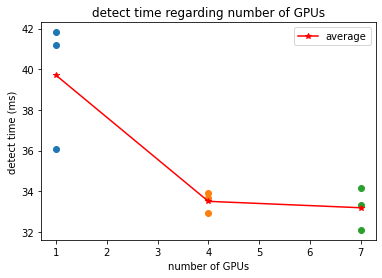

In [11]:
data_folder = "gpu_data"
operation = "detect"

average_operation_duration_per_num_gpu = getAvgOperationDuration(data_folder, operation)
drawAvgOperationDuration(average_operation_duration_per_num_gpu, operation)

{1: 649.812706959707, 4: 737.4466214896214, 7: 1028.6622258852258}


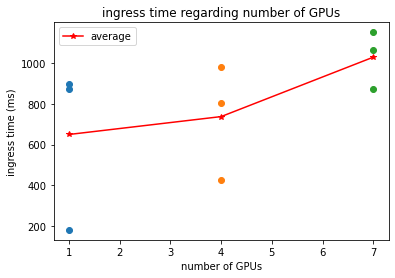

In [12]:
data_folder = "gpu_data"
operation = "ingress"

average_operation_duration_per_num_gpu = getAvgOperationDuration(data_folder, operation)
drawAvgOperationDuration(average_operation_duration_per_num_gpu, operation)